In [1]:
import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem

# other useful imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import astropy.units as u
from astropy.io import fits
from astropy.utils.data import download_file

# Python standard library
import time
import warnings
import math
from itertools import combinations


# Third-party software
import numpy as np
import numpy.ma as ma

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table, vstack, hstack, join
from astropy.coordinates import SkyCoord
from astropy.io import fits

# Astroquery. This tutorial requires 0.3.5 or greater.
import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir('/Users/cdann/Downloads/splat-master/splat-master/resources/Spectra/SPEX-PRISM/')

Adding 145 sources from C:\Users\cdann\Downloads\splat-master\splat-master/resources/Data/Public/LRIS-RED/ to spectral database
gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!
Could not import regions, which is required for some of the functionalities of this module.


In [2]:
cols = {'2MASS':( '_r', 'RAJ2000', 'DEJ2000', 'errMaj', 'errMin', 'errPA', '_2MASS', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 
                     'Kmag', 'e_Kmag', 'Date', '_tab1_36'), 
               'SDSS':('_r', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'class', 'SDSS12', 'objID', 'SpObjID', 'umag',
                     'e_umag', 'ObsDate', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'spType',
                     'spCl', 'subCl', 'spS_N', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE'),
               'DES':('_r', 'RAJ2000', 'DEJ2000', 'DES', 'S_Gg', 'S_Gr', 'S_Gi', 'S_Gz', 'S_GY', 'gmag', 'rmag', 'imag', 'zmag',
                     'Ymag', 'e_gmag', 'e_rmag', 'e_imag', 'e_zmag', 'e_Ymag', 'EBV'),
               'VISTA':('_r', 'RAJ2000', 'DEJ2000', 'SrcID', 'Name', 'Mclass', 'E_B-V_', 'AY', 'AJ', 'AH', 'AKs', '_tab1_36', 'Yap3',
                     'e_Yap3', '_tab1_58', 'Jap3', 'e_Jap3', '_tab1_82', 'Hap3', 'e_Hap3', '_tab1_106', 'Ksap3', 'e_Ksap3'), 
               'ALLWISE':('_r', 'RAJ2000', 'DEJ2000', 'AllWISE', 'eeMaj', 'eeMin', 'eePA', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag',
                     'W3mag', 'e_W3mag', 'W4mag', 'e_W4mag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'ex', 'pmRA', 
                     'e_pmRA', 'pmDE', 'e_pmDE'),
               'PANSTARRS':('_r', 'RAJ2000', 'DEJ2000', 'objID', 'e_RAJ2000', 'e_DEJ2000', '_tab1_10', 'gmag', 'e_gmag','rmag',
                     'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag','ymag', 'e_ymag'), 
               'GAIA':('_r', 'DR2Name', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Epoch', 'Plx', 'e_Plx', 
                     'pmRA', 'e_pmRA','pmDE', 'e_pmDE', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'RV',
                     'e_RV', 'Teff', 'AG', 'E_BP-RP_', 'Rad', 'Lum'),
               'UKIDSS':('_r', 'RAJ2000', 'e_RAJ2000', 'DEJ2000', 'e_DEJ2000', 'ULAS', 'Ymag', 'e_Ymag', 'Jmag1', 'e_Jmag1',
                     'Jmag2', 'e_Jmag2', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'ID', 'Epoch','pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'cl'),
               'DENIS':('_r', 'RAJ2000', 'DEJ2000', 'Imag', 'e_Imag', 'Jmag', 'e_Jmag', 'Kmag', 'e_Kmag', 'Rmag', 'Bmag', 'ObsJD',
                     'DENIS')}
catalogs = {'2MASS', 'SDSS', 'DES', 'VISTA', 'ALLWISE', 'PANSTARRS', 'GAIA', 'UKIDSS', 'DENIS'}
v2 = Vizier(columns=['+_r', '**'])
catalog_files = {'2MASS':'II/246/out', 'SDSS':'V/147/sdss12', 'DES':'II/357/des_dr1', 'VISTA':'II/359/vhs_dr4', 
                'ALLWISE':'II/328/allwise', 'PANSTARRS':'II/349/ps1', 'GAIA':'I/345/gaia2', 'UKIDSS':'II/319/las9',
                'DENIS':'B/denis/denis'}
col_rename = {'2MASS': ('2MASS_r', '2MASS_RA', '2MASS_DEC', '2MASS_POS_E_MAJ', '2MASS_POS_E_MIN', '2MASS_POS_E_PA', '2MASS_DESIGNATION',
                       '2MASS_JMAG', '2MASS_JMAG_E', '2MASS_HMAG', '2MASS_HMAG_E', '2MASS_KMAG', '2MASS_KMAG_E', '2MASS_EPOCH_YEAR', 
                       '2MASS_EPOCH_JD'),
             'SDSS':('SDSS_r', 'SDSS_RA', 'SDSS_RA_E', 'SDSS_DEC', 'SDSS_DEC_E', 'SDSS_TYPE', 'SDSS_DESIGNATION', 'SDSS_ID',  
                      'SDSS_SPECTRUM_ID','SDSS_uMAG', 'SDSS_uMAG_E', 'SDSS_EPOCH_YEAR', 'SDSS_gMAG', 'SDSS_gMAG_E',
                     'SDSS_rMAG', 'SDSS_rMAG_E', 'SDSS_iMAG', 'SDSS_iMAG_E', 'SDSS_zMAG', 'SDSS_zMAG_E', 'SDSS_SPECTRUM_SPT',
                     'SDSS_SPECTRUM_CLASS', 'SDSS_SPECTRUM_TYPE', 'SDSS_SPECTRUM_SNR', 'SDSS_PMRA', 'SDSS_PMRA_E', 'SDSS_PMDEC', 
                     'SDSS_PMDEC_E'),
             'DES':('DES_r', 'DES_RA', 'DES_DEC', 'DES_DESIGNATION', 'DES_EXTENDED_FLAG_g', 'DES_EXTENDED_FLAG_r', 'DES_EXTENDED_FLAG_i',
                    'DES_EXTENDED_FLAG_z', 'DES_EXTENDED_FLAG_Y', 'DES_gMAG', 'DES_rMAG', 'DES_iMAG', 'DES_zMAG', 'DES_YMAG', 'DES_gMAG_E',
                    'DES_rMAG_E', 'DES_iMAG_E', 'DES_zMAG_E', 'DES_YMAG_E', 'DES_EBV'),
             'VISTA':('VISTA_r', 'VISTA_RA', 'VISTA_DEC', 'VISTA_ID', 'VISTA_DESIGNATION', 'VISTA_TYPE', 'VISTA_EBV', 'VISTA_AY',
                      'VISTA_AJ', 'VISTA_AH', 'VISTA_AK', 'VISTA_YMAG_EPOCH_MJD', 'VISTA_YMAG', 'VISTA_YMAG_E', 'VISTA_JMAG_EPOCH_MJD',
                      'VISTA_JMAG', 'VISTA_JMAG_E', 'VISTA_HMAG_EPOCH_MJD', 'VISTA_HMAG', 'VISTA_HMAG_E', 'VISTA_KMAG_EPOCH_MJD', 'VISTA_KMAG',
                      'VISTA_KMAG_E'),
             'ALLWISE':('ALLWISE_r', 'ALLWISE_RA', 'ALLWISE_DEC', 'ALLWISE_DESIGNATION', 'ALLWISE_POS_E_MAJ', 'ALLWISE_POS_E_MIN', 
                        'ALLWISE_POS_E_PA', 'ALLWISE_W1MAG', 'ALLWISE_W1MAG_E', 'ALLWISE_W2MAG', 'ALLWISE_W2MAG_E', 'ALLWISE_W3MAG', 
                        'ALLWISE_W3MAG_E', 'ALLWISE_W4MAG', 'ALLWISE_W4MAG_E', 'ALLWISE_JMAG', 'ALLWISE_JMAG_E', 'ALLWISE_HMAG', 
                        'ALLWISE_HMAG_E', 'ALLWISE_KMAG', 'ALLWISE_KMAG_E', 'ALLWISE_EXTENDED_FLAG', 'ALLWISE_PMRA', 'ALLWISE_PMRA_E',
                        'ALLWISE_PMDEC', 'ALLWISE_PMDEC_E'),
             'PANSTARRS':('PANSTARRS_r', 'PANSTARRS_RA', 'PANSTARRS_DEC', 'PANSTARRS_DESIGNATION', 'PANSTARRS_RA_E', 'PANSTARRS_DEC_E', 
                          'PANSTARRS_EPOCH_MJD', 'PANSTARRS_gMAG', 'PANSTARRS_gMAG_E', 'PANSTARRS_rMAG', 'PANSTARRS_rMAG_E', 'PANSTARRS_iMAG',
                          'PANSTARRS_iMAG_E', 'PANSTARRS_zMAG', 'PANSTARRS_zMAG_E', 'PANSTARRS_yMAG', 'PANSTARRS_yMAG_E'),
             'GAIA':('GAIA_r', 'GAIA_DESIGNATION', 'GAIA_RA', 'GAIA_RA_E', 'GAIA_DEC', 'GAIA_DEC_E', 'GAIA_ID', 'GAIA_EPOCH_YEAR', 
                     'GAIA_PLX', 'GAIA_PLX_E', 'GAIA_PMRA', 'GAIA_PMRA_E', 'GAIA_PMDEC', 'GAIA_PMDEC_E', 'GAIA_GMAG', 'GAIA_GMAG_E',
                     'GAIA_BPMAG', 'GAIA_BPMAG_E', 'GAIA_RPMAG', 'GAIA_RPMAG_E', 'GAIA_RV', 'GAIA_RV_E', 'GAIA_TEFF', 'GAIA_AG', 'GAIA_EBR',
                     'GAIA_RADIUS', 'GAIA_LUMINOSITY'),
             'UKIDSS':('UKIDSS_r', 'UKIDSS_RA', 'UKIDSS_RA_E', 'UKIDSS_DEC', 'UKIDSS_DEC_E', 'UKIDSS_DESIGNATION', 'UKIDSS_YMAG', 'UKIDSS_YMAG_E',
                       'UKIDSS_EPOCH1_JMAG', 'UKIDSS_EPOCH1_JMAG_E', 'UKIDSS_EPOCH2_JMAG', 'UKIDSS_EPOCH2_JMAG_E', 'UKIDSS_HMAG', 'UKIDSS_HMAG_E',
                       'UKIDSS_KMAG', 'UKIDSS_KMAG_E', 'UKIDSS_ID', 'UKIDSS_EPOCH_YEAR', 'UKIDSS_PMRA', 'UKIDSS_PMRA_E', 'UKIDSS_PMDEC', 
                       'UKIDSS_PMDEC_E', 'UKIDSS_TYPE'),
              'DENIS':('DENIS_r', 'DENIS_RA', 'DENIS_DEC', 'DENIS_IMAG', 'DENIS_IMAG_E', 'DENIS_JMAG', 'DENIS_JMAG_E', 'DENIS_KMAG', 
                      'DENIS_KMAG_E', 'DENIS_RMAG', 'DENIS_BMAG', 'DENIS_EPOCH_JD', 'DENIS_DESIGNATION')}

In [20]:
def cat_results(RA, DEC, cat, unit = 'ha', rad = '30s'):
    count = list(catalogs).count(cat)
    if count > 0:
        #print("Proper Catalog")
        if unit is 'ha':
            catalog_result = v2.query_region(coord.SkyCoord(ra=RA, dec=DEC,
                                                            unit=(u.hourangle, u.degree),
                                                            frame='icrs'),
                                            radius= rad,
                                            catalog=[cat])
                        
#            return(catalog_result[catalog_files[cat]])
        if unit is 'degree':
            catalog_result = v2.query_region(coord.SkyCoord(ra=RA, dec=DEC,
                                                            unit=(u.degree, u.degree),
                                                            frame='icrs'),
                                            radius = rad,
                                            catalog=[cat])
#            return(catalog_result[catalog_files[cat]])        
    else:
        return("Improper Catalog")
        
    if any(catalog_result) == True:
        revise = catalog_result[catalog_files[cat]]
        temp_table = Table([])
        subs = list(cols[cat])
        
        for x in range(len(subs)):
            count_cols = revise.colnames.count(subs[x])
            if count_cols > 0:
                temp_table = hstack([temp_table, revise[subs[x]]])
        for y in range(len(list(temp_table.colnames))):
            temp_table.rename_column(cols[cat][y], col_rename[cat][y])
        return(temp_table)
    else:
        return("No data")
        

In [25]:
cat_results('05:39:51.90', '-00:59:07.2', '2MASS')

2MASS_r,2MASS_RA,2MASS_DEC,2MASS_POS_E_MAJ,2MASS_POS_E_MIN,2MASS_POS_E_PA,2MASS_DESIGNATION,2MASS_JMAG,2MASS_JMAG_E,2MASS_HMAG,2MASS_HMAG_E,2MASS_KMAG,2MASS_KMAG_E,2MASS_EPOCH_YEAR,2MASS_EPOCH_JD
arcsec,deg,deg,arcsec,arcsec,deg,,mag,mag,mag,mag,mag,mag,,d
float64,float64,float64,float32,float32,int16,bytes17,float32,float32,float32,float32,float32,float32,bytes10,float64
5.519,84.966672,-0.983863,0.07,0.06,90,05395200-0059019,14.033,0.031,13.104,0.026,12.527,0.024,1998-10-30,2451116.8436
18.329,84.968325,-0.989991,0.07,0.06,90,05395239-0059239,14.389,0.036,13.927,0.029,13.736,0.052,1998-10-30,2451116.8436
23.214,84.971565,-0.981677,0.11,0.11,97,05395317-0058540,16.170,0.080,15.653,0.091,14.916,--,1998-10-30,2451116.8436


In [4]:
splat.searchLibrary(spt='L4')

,SOURCE_KEY,NAME,DESIGNATION,RA,DEC,DISCOVERY_REFERENCE,OPT_TYPE,OPT_TYPE_REF,NIR_TYPE,NIR_TYPE_REF,LIT_TYPE,LIT_TYPE_REF,OBJECT_TYPE,J_2MASS,J_2MASS_E,H_2MASS,H_2MASS_E,KS_2MASS,KS_2MASS_E,JK_EXCESS,COLOR_EXTREMITY,LUMINOSITY_CLASS,METALLICITY_CLASS,GRAVITY_CLASS_OPTICAL,GRAVITY_CLASS_OPTICAL_REF,GRAVITY_CLASS_NIR,GRAVITY_CLASS_NIR_REF,CLUSTER,CLUSTER_REF,LIBRARY,BINARY,BINARY_REF,SBINARY,SBINARY_REF,COMPANION_NAME,COMPANION_REF,SIMBAD_OTYPE,SIMBAD_NAME,SIMBAD_SPT,SIMBAD_SPT_REF,SIMBAD_SEP,PARALLAX,PARALLAX_E,PARALLEX_REF,DISTANCE_PHOT,DISTANCE_PHOT_E,DISTANCE,DISTANCE_E,MU,MU_E,MU_RA,MU_DEC,MU_REF,VTAN,VTAN_E,RV,RV_E,RV_REF,VSINI,VSINI_E,VSINI_REF,NOTE,SELECT,SPTN,DATA_KEY,DATA_FILE,INSTRUMENT,OBSERVATION_DATE,OBSERVATION_TIME,JULIAN_DATE,PROGRAM_NUMBER,PROGRAM_PI,OBSERVER,RESOLUTION,AIRMASS,REDUCTION_SPEXTOOL_VERSION,REDUCTION_PERSON,REDUCTION_DATE,QUALITY_FLAG,MEDIAN_SNR,SPEX_TYPE,SPEX_GRAVITY_CLASSIFICATION,PUBLISHED,DATA_REFERENCE,NOTE_SP
0,10026,2MASSI J0013578-223520,J00135779-2235200,3.490792,-22.588890,2003A&A...403..929K,L4,2003A&A...403..929K,NaN,NaN,L4,2003A&A...403..929K,VLM,15.775,0.065,14.595,0.062,14.036,0.051,-0.100,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASS J00135779-2235200,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.170000,31.8900,58.00,-61.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11295,11295_10026.fits,SPEX-PRISM,20091104,09 07 30.671410,55139.88000,NaN,NaN,Burgasser,120.0,1.482,v3.4,NaN,NaN,OK,56.000000,L5.0,FLD-G,Y,2014ApJ...794..143B,NaN
1,10062,2MASS J00332386-1521309,J00332386-1521309,8.349417,-15.358583,2003AJ....125.3302G,L4beta,2009AJ....137.3345C,L1,2010ApJ...715..561A,L4beta,2009AJ....137.3345C,VLM,15.286,0.056,14.208,0.051,13.410,0.039,0.290,NaN,NaN,NaN,beta,NaN,INT-G,OTHER,NaN,NaN,young,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASS J00332386-1521309,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.190000,27.2000,330.00,46.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11197,11197_10062.fits,SPEX-PRISM,20081129,05 34 46.271138,54799.73200,NaN,NaN,Allers,120.0,1.249,v3.4,NaN,NaN,OK,79.000000,L2.0,FLD-G,Y,2013ApJ...772...79A,NaN
2,10127,2MASSW J0129122+351758,J01291221+3517580,22.300875,35.299442,1999ApJ...519..802K,L4,1999ApJ...519..802K,NaN,NaN,L4,1999ApJ...519..802K,VLM,16.779,0.159,15.343,0.093,14.696,0.080,0.200,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,Field,2015ApJS..219...33G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASSW J0129122+351758,L4,2011ApJS..197...19K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11317,11317_10127.fits,SPEX-PRISM,20091107,10 26 23.630825,55142.93500,NaN,NaN,Burgasser,120.0,1.132,v3.4,NaN,NaN,OK,40.000000,L4.0,FLD-G,Y,2014ApJ...794..143B,NaN
3,10132,2MASS J01311838+3801554,J01311838+3801554,22.826584,38.032055,2007AJ....133..439C,L4:,2007AJ....133..439C,NaN,NaN,L4:,2007AJ....133..439C,VLM,14.679,0.034,13.696,0.034,13.054,0.034,0.280,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MUCD 13061,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.610000,19.8500,394.00,-22.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,10072,10072_10132.fits,SPEX-PRISM,20030903,NaN,52885.50000,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,OK,87.000000,L2.0,FLD-G,Y,2010ApJ...710.1142B,NaN
4,12752,2MASS J01341675-0546530,J01341675-0546530,23.570708,-5.780561,2017arXiv170803688K,NaN,NaN,L4.0,SPL,L4.0,SPL,VLM,16.165,0.073,15.215,0.067,14.521,0.084,0.074,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.912643,7.257650,41.912643,7.257650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,13022,13022_12752.fits,SPEX-PRISM,20150908,09 39 1.7769010,57273.40210,NaN,Kellogg,Kellogg,120.0,1.662,v4.0,Kellogg,NaN,OK,42.879940,L4.0,FLD-G,Y,2017arXiv170803688K,NaN
5,12757,2MASS J01442482-0430031,J01442482-0430031,26.104292,-4.501961,2017arXiv170803688K,NaN,NaN,L6

In [4]:
#Will need to change this such that it also returns the spectrum.  Ask Khryz about this.
def get_coords(file_name):
    fits_test = fits.open('/Users/cdann/Downloads/splat-master/splat-master/resources/Spectra/SPEX-PRISM/%s'%file_name)[0]
    RA = fits_test.header['RA']
    DEC = fits_test.header['DEC']
    return(RA, DEC)
    #return('DEC = %s'%DEC)

In [42]:
get_coords('10001_10443.fits')

('05:39:51.90', '-00:59:07.2')

In [106]:
get_coords('10001_10443.fits')
RA = get_coords('10001_10443.fits')[0]
DEC = get_coords('10001_10443.fits')[1]

In [107]:
print(RA)
print(DEC)

05:39:51.90
-00:59:07.2


In [38]:
spec_results('10001_10443.fits', 'WISE')

TableList with 2 tables:
	'0:II/311/wise' with 16 column(s) and 3 row(s) 
	'1:II/328/allwise' with 15 column(s) and 4 row(s) 


_r,DEJ2000,WISE,RAJ2000,eeMaj,eeMin,eePA,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,Jmag
arcsec,deg,,deg,arcsec,arcsec,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag
float64,float64,bytes19,float64,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32
3.164,-14.780841,J053951.96-144651.0,84.966537,0.751,0.686,106,16.734,0.117,16.951,--,12.877,--,9.186,--,--
17.549,-14.782073,J053952.99-144655.4,84.970821,0.372,0.340,109,15.856,0.063,15.953,0.176,12.940,--,9.294,--,16.294
23.917,-14.775743,J053950.63-144632.6,84.960985,0.104,0.100,156,13.345,0.025,13.324,0.032,12.904,--,9.209,--,14.369


In [25]:
def convert_coords(fits):
    get_coords(fits)
    RA = get_coords(fits)[0]
    DEC = get_coords(fits)[1]
    coords = SkyCoord(RA, DEC, unit=(u.hourangle, u.degree))
    convert_RA = coords.ra.degree
    convert_DEC = coords.dec.degree
    convert = (convert_RA, convert_DEC)
    return(convert)

In [92]:

coords = SkyCoord('00:57:00.83', '02:21:47.2', unit=(u.hourangle, u.degree))
convert_RA = coords.ra.degree
convert_DEC = coords.dec.degree
convert = (convert_RA, convert_DEC)
print(convert)

(14.253458333333331, 2.3631111111111114)


In [59]:
coords = SkyCoord('03:44:09.98', '01:36:37.4', unit=(u.hourangle, u.degree))
convert_RA = coords.ra.degree
convert_DEC = coords.dec.degree
convert = (convert_RA, convert_DEC)
print(convert)

(56.04158333333333, 1.6103888888888889)


In [88]:
MASS_results_deg(56.04158333333333, 1.6103888888888889)

Empty TableList


'No data'

In [48]:
convert_coords('10001_10443.fits')

84.96624999999999

In [26]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [57]:
find_nearest(RA_list, convert_coords('10001_10443.fits')[0])

84.970903

In [27]:
def closest_source(fits):
    MASS_table = Table(spec_results(fits, '2MASS'))
    closest_source = MASS_table[0]
    new_RA = closest_source['RAJ2000']
    new_DEC = closest_source['DEJ2000']
    new_coords = (new_RA, new_DEC)
    return(new_coords)

In [29]:
closest_source('10001_10443.fits')

TableList with 1 tables:
	'0:II/246/out' with 16 column(s) and 2 row(s) 


(84.970903, -14.782036)

In [ ]:
def compare_catalogs(RA, DEC, orig_cat):
    cat_list = ['2MASS', 'SDSS', 'DES', 'ALLWISE', 'PANSTARRS', 'GAIA', 'UKIDSS', 'VISTA', 'DENIS']
    orig_table = choose_results_deg(RA, DEC, orig_cat)
    draft_table = []
    
    #The first for statement sorts through the catalogs and returns only data from catalogs that have data.  The data is
    # returned into the first "draft" table.
    
    for x in cat_list:
        if x == orig_cat:
            temp_table = Table(choose_results_deg(RA, DEC, x)[0]) #Added a [0] to the table to take into account other sources
            for z in range(len(list(temp_table.colnames))):       #May need to change this to something more sophisticated later   
                if x in temp_table.colnames[z]:
                    continue
                else:
                    temp_table.rename_column(list(temp_table.colnames)[z], x+"_"+list(temp_table.colnames)[z])
            #temp_table.rename_column('_r', x+'_r')
            draft_table += temp_table
            continue
        else:
            if 'No data' in choose_results_deg(RA, DEC, x):
                continue
                
    #Added if statement to take into account if more than one source is found in a catalog.  If so, then only the closest
    # source is used.  This will be altered later when a code is developed that checks whether the closest source is the 
    # correct one.
            else:
                if len(list(choose_results_deg(RA, DEC, x)['_r'])) > 1:
                    nearest = find_nearest(list(choose_results_deg(RA, DEC, x)['_r']), 0)
                    for y in range(len(list(choose_results_deg(RA, DEC, x)['_r']))):
                        if choose_results_deg(RA, DEC, x)['_r'][y] == nearest:
                            temp_table = Table(choose_results_deg(RA, DEC, x)[y])

                        else:
                            continue
                else:
                    temp_table = Table(choose_results_deg(RA, DEC, x))
                
            for z in range(len(list(temp_table.colnames))):
                if x in temp_table.colnames[z]:
                    continue
                else:
                    temp_table.rename_column(list(temp_table.colnames)[z], x+"_"+list(temp_table.colnames)[z])               
            draft_table += temp_table
        
        
    #The next for statement 
    

    
    #In theory, draft2_table should contain at most 9 values, one for each catalog.  If there are more, then code will need
    # to be revised.  If there are less, then some catalogs either did not return any data or the coordinates were too far off
    
    
    if len(draft_table) == 9:
        print("9")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5], 
                          draft_table[6], draft_table[7], draft_table[8]])
    if len(draft_table) == 8:
        print("8")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5], 
                          draft_table[6], draft_table[7]])
    if len(draft_table) > 9:
        print("At least one catalog contains more than one source that is close to coordinates")
    if len(draft_table) == 7:
        print("7")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5],
                          draft_table[6]])    
    if len(draft_table) == 6:
        print("6")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5]])
    if len(draft_table) == 5:
        print("5")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4]])
    if len(draft_table) == 4:
        print("4")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3]])
    if len(draft_table) == 3:
        print("3")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2]])
    if len(draft_table) == 2:
        print("2")
        final_table = hstack([draft_table[0], draft_table[1]])
    if len(draft_table) == 1:
        print("1")
        final_table = hstack([draft_table[0]])
    if len(draft_table) < 1:
        print("Something went wrong.  No source data detected")
    

    
    return(final_table)

In [36]:
def plot_verify(function):
    temp_table = Table.from_pandas(function)
    #print(temp_table.colnames)
    if all([('2MASS-Jmag' in temp_table.colnames),('2MASS-Hmag' in temp_table.colnames),('2MASS-Kmag' in temp_table.colnames)]):
        value1 = temp_table['2MASS-Jmag']
        value2 = temp_table['2MASS-Hmag']
        value3 = temp_table['2MASS-Kmag']
        plt.plot(value1-value2, value2-value3, 'bo')

    if all([('2MASS-Jmag' in temp_table.colnames),('SDSS-rmag' in temp_table.colnames),('SDSS-imag' in temp_table.colnames)]):
        value1 = temp_table['SDSS-rmag']
        value2 = temp_table['SDSS-imag']
        value3 = temp_table['2MASS-Jmag']
        plt.plot(value1-value2, value2-value3, 'ro')
        
    if all([('ALLWISE-W1mag' in temp_table.colnames),('ALLWISE-W2mag' in temp_table.colnames),
            ('2MASS-Jmag' in temp_table.colnames)]):
        value1 = temp_table['ALLWISE-W1mag']
        value2 = temp_table['ALLWISE-W2mag']
        value3 = temp_table['2MASS-Jmag']
        plt.plot(value1-value2, value2-value3, 'go')
        
    if all([('UKIDSS-Jmag' in temp_table.colnames),('UKIDSS-Kmag' in temp_table.colnames),
            ('2MASS-Jmag' in temp_table.colnames), ('2MASS-Kmag' in temp_table.colnames)]):
        value1 = temp_table['UKIDSS-Jmag']
        value2 = temp_table['UKIDSS-Kmag']
        value3 = temp_table['2MASS-Jmag']
        value4 = temp_table['2MASS-Kmag']
        plt.plot(value1-value2, value3-value4, 'b+')
        
    if all([('PANSTARRS-imag' in temp_table.colnames),('PANSTARRS-zmag' in temp_table.colnames),
            ('SDSS-imag' in temp_table.colnames), ('SDSS-zmag' in temp_table.colnames)]):
        value1 = temp_table['PANSTARRS-imag']
        value2 = temp_table['PANSTARRS-zmag']
        value3 = temp_table['SDSS-imag']
        value4 = temp_table['SDSS-zmag']
        plt.plot(value1-value2, value3-value4, 'r+')
        
    if all([('GAIA-Plx' in temp_table.colnames),('2MASS-Jmag' in temp_table.colnames),
            ('2MASS-Kmag' in temp_table.colnames)]):
        value1 = 1000/temp_table['GAIA-Plx']
        value2 = temp_table['2MASS-Jmag']
        value3 = temp_table['2MASS-Kmag']
        value4 = value2 - (5*math.log(value1/10, 10))
        plt.plot(value2-value3, value4, 'g+')
    if all([('GAIA-Plx' in temp_table.colnames),('SDSS-imag' in temp_table.colnames),
            ('SDSS-rmag' in temp_table.colnames)]):
        value1 = 1000/temp_table['GAIA-Plx']
        value2 = temp_table['SDSS-rmag']
        value3 = temp_table['SDSS-imag']
        value4 = value3 - (5*math.log(value1/10, 10))
        plt.plot(value2-value3, value4, 'y+')
    else:
        print("NO")

In [39]:
def find_source(fits):
    MASS_table = Table(spec_results(fits, '2MASS'))
    orig_coords = convert_coords(fits)
    RA_list = np.array(MASS_table['RA'])
    DEC_list = np.array(MASS_table['DEC'])
    RA_close = find_nearest(RA_list, orig_coords[0])
    DEC_close = find_nearest(DEC_list, orig_coords[1])
    new_coords = (RA_close, DEC_close)
    return(new_coords)

In [54]:
find_source('10001_10443.fits')

(84.966672, -0.983863)

In [124]:
table_test = Table([])
table_test['RA_original'] = [84.970903]
table_test

RA_original
float64
84.970903


In [38]:
def compare_catalogs(RA, DEC, orig_cat):
    cat_list = ['2MASS', 'SDSS', 'DES', 'ALLWISE', 'PANSTARRS', 'GAIA', 'UKIDSS', 'VISTA', 'DENIS']
    orig_table = choose_results_deg(RA, DEC, orig_cat)
    draft_table = []
    
    #The first for statement sorts through the catalogs and returns only data from catalogs that have data.  The data is
    # returned into the first "draft" table.
    
    for x in cat_list:
        if x == orig_cat:
            temp_table = Table(choose_results_deg(RA, DEC, x)[0]) #Added a [0] to the table to take into account other sources
            for z in range(len(list(temp_table.colnames))):       #May need to change this to something more sophisticated later   
                if x in temp_table.colnames[z]:
                    continue
                else:
                    temp_table.rename_column(list(temp_table.colnames)[z], x+"_"+list(temp_table.colnames)[z])
            #temp_table.rename_column('_r', x+'_r')
            draft_table += temp_table
            continue
        else:
            if 'No data' in choose_results_deg(RA, DEC, x):
                continue
                
    #Added if statement to take into account if more than one source is found in a catalog.  If so, then only the closest
    # source is used.  This will be altered later when a code is developed that checks whether the closest source is the 
    # correct one.
            else:
                if len(list(choose_results_deg(RA, DEC, x)['_r'])) > 1:
                    nearest = find_nearest(list(choose_results_deg(RA, DEC, x)['_r']), 0)
                    for y in range(len(list(choose_results_deg(RA, DEC, x)['_r']))):
                        if choose_results_deg(RA, DEC, x)['_r'][y] == nearest:
                            temp_table = Table(choose_results_deg(RA, DEC, x)[y])

                        else:
                            continue
                else:
                    temp_table = Table(choose_results_deg(RA, DEC, x))
                
            for z in range(len(list(temp_table.colnames))):
                if x in temp_table.colnames[z]:
                    continue
                else:
                    temp_table.rename_column(list(temp_table.colnames)[z], x+"_"+list(temp_table.colnames)[z])               
            draft_table += temp_table
        
        
    #The next for statement 
    

    
    #In theory, draft2_table should contain at most 9 values, one for each catalog.  If there are more, then code will need
    # to be revised.  If there are less, then some catalogs either did not return any data or the coordinates were too far off
    
    
    if len(draft_table) == 9:
        print("9")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5], 
                          draft_table[6], draft_table[7], draft_table[8]])
    if len(draft_table) == 8:
        print("8")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5], 
                          draft_table[6], draft_table[7]])
    if len(draft_table) > 9:
        print("At least one catalog contains more than one source that is close to coordinates")
    if len(draft_table) == 7:
        print("7")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5],
                          draft_table[6]])    
    if len(draft_table) == 6:
        print("6")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4], draft_table[5]])
    if len(draft_table) == 5:
        print("5")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3], draft_table[4]])
    if len(draft_table) == 4:
        print("4")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2], draft_table[3]])
    if len(draft_table) == 3:
        print("3")
        final_table = hstack([draft_table[0], draft_table[1], draft_table[2]])
    if len(draft_table) == 2:
        print("2")
        final_table = hstack([draft_table[0], draft_table[1]])
    if len(draft_table) == 1:
        print("1")
        final_table = hstack([draft_table[0]])
    if len(draft_table) < 1:
        print("Something went wrong.  No source data detected")
    

    
    return(final_table)


In [39]:
def find_data(fits, catalog):
    find_source(fits)
    RA = find_source(fits)[0]
    print(RA)
    DEC = find_source(fits)[1]
    print(DEC)
    total = Table([])
    total['RA_original'] = [RA]
    total['RA_original'].unit = u.degree
    total['DEC_original'] = [DEC]
    total['DEC_original'].unit = u.degree
    
    temp_table = compare_catalogs(RA, DEC, catalog)
    total = hstack([total, temp_table])
    panda_total = total.to_pandas()
    return(panda_total)

In [55]:
find_data('10001_10443.fits', '2MASS')

84.966672
-0.983863
7


,RA_original,DEC_original,2MASS__r,2MASS_RA,2MASS_DEC,2MASS_POS_E_MAJ,2MASS_POS_E_MIN,2MASS_POS_E_PA,2MASS_DESIGNATION,2MASS_Jmag,2MASS_Jmag_E,2MASS_Hmag,2MASS_Hmag_E,2MASS_Kmag,2MASS_Kmag_E,2MASS_Epoch_Year,2MASS_Epoch_JD,SDSS__r,SDSS_RA,SDSS_RA_E,SDSS_DEC,SDSS_DEC_E,SDSS_Type,SDSS_DESIGNATION,SDSS_ID,SDSS_SPECTRUM_ID,SDSS_umag,SDSS_umag_E,SDSS_Epoch_Year,SDSS_gmag,SDSS_gmag_E,SDSS_rmag,SDSS_rmag_E,SDSS_imag,SDSS_imag_E,SDSS_zmag,SDSS_zmag_E,SDSS_SPECTRUM_SPT,SDSS_SPECTRUM_CLASS,SDSS_SPECTRUM_TYPE,SDSS_SPECTRUM_SNR,SDSS_pmRA,SDSS_pmRA_E,SDSS_pmDEC,SDSS_pmDEC_E,ALLWISE__r,ALLWISE_RA,ALLWISE_DEC,ALLWISE_DESIGNATION,ALLWISE_POS_E_MAJ,ALLWISE_POS_E_MIN,ALLWISE_POS_E_PA,ALLWISE_W1mag,ALLWISE_W1mag_E,ALLWISE_W2mag,ALLWISE_W2mag_E,ALLWISE_W3mag,ALLWISE_W3mag_E,ALLWISE_W4mag,ALLWISE_W4mag_E,ALLWISE_Jmag,ALLWISE_Jmag_E,ALLWISE_Hmag,ALLWISE_Hmag_E,ALLWISE_Kmag,ALLWISE_Kmag_E,ALLWISE_EXTENDED_FLAG,ALLWISE_pmRA,ALLWISE_pmRA_E,ALLWISE_pmDEC,ALLWISE_pmDEC_E,PANSTARRS__r,PANSTARRS_RA,PANSTARRS_DEC,PANSTARRS_DESIGNATION,PANSTARRS_RA_E,PANSTARRS_DEC_E,PANSTARRS_Epoch_MJD,PANSTARRS_gmag,PANSTARRS_gmag_E,PANSTARRS_rmag,PANSTARRS_rmag_E,PANSTARRS_imag,PANSTARRS_imag_E,PANSTARRS_zmag,PANSTARRS_zmag_E,PANSTARRS_ymag,PANSTARRS_ymag_E,GAIA__r,GAIA_DESIGNATION,GAIA_RA,GAIA_RA_E,GAIA_DEC,GAIA_DEC_E,GAIA_ID,GAIA_Epoch_Year,GAIA_Plx,GAIA_Plx_E,GAIA_pmRA,GAIA_pmRA_E,GAIA_pmDEC,GAIA_pmDEC_E,GAIA_Gmag,GAIA_Gmag_E,GAIA_BPmag,GAIA_BPmag_E,GAIA_RPmag,GAIA_RPmag_E,GAIA_RV,GAIA_RV_E,GAIA_Teff,GAIA_AG,GAIA_EBR,GAIA_Rad,GAIA_Lum,VISTA__r,VISTA_RA,VISTA_DEC,VISTA_ID,VISTA_DESIGNATION,VISTA_Type,VISTA_EBV,VISTA_AY,VISTA_AJ,VISTA_AH,VISTA_AKs,VISTA_Ymag_Epoch_MJD,VISTA_Ymag,VISTA_Ymag_E,VISTA_Jmag_Epoch_MJD,VISTA_Jmag,VISTA_Jmag_E,VISTA_Hmag_Epoch_MJD,VISTA_Hmag,VISTA_Hmag_E,VISTA_Kmag_Epoch_MJD,VISTA_Kmag,VISTA_Kmag_E,DENIS__r,DENIS_RA,DENIS_DEC,DENIS_Imag,DENIS_Imag_E,DENIS_Jmag,DENIS_Jmag_E,DENIS_Kmag,DENIS_Kmag_E,DENIS_Rmag,DENIS_Bmag,DENIS_Epoch_JD,DENIS_DESIGNATION
0,84.966672,-0.983863,0.03,84.966672,-0.983863,0.07,0.06,90,b'05395200-0059019',14.033,0.031,13.104,0.026,12.527,0.024,b'1998-10-30',2.451117e+06,0.099,84.966653,0.033,-0.983879,0.035,6,b'J053951.99-005901.9',1237646585564431025,0,24.379999,0.791,1998.8786,24.774,0.551,21.431,0.066,19.045,0.015,16.688999,0.01,b'',b'',b'',NaN,NaN,NaN,NaN,NaN,4.169,84.967146,-0.982809,b'J053952.11-005858.1',0.0403,0.0373,15.2,11.891,0.023,11.594,0.021,11.716,0.288,9.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,523,56,449,57,4.443,84.96719,-0.982745,106820849671331003,0.0044,0.0056,55651.690382,NaN,NaN,21.2317,0.0542,19.0754,0.1091,17.1562,0.0081,16.1001,0.0053,5.99,b'Gaia DR2 3217523558083415040',84.967381,0.4367,-0.98236,0.4665,3217523558083415040,2015.5,78.5318,0.5707,162.446,0.789,321.149,0.758,19.178,0.0055,20.407,0.3326,17.4439,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,84.967154,-0.982864,472567207725,b'VHS J053952.11-005858.3',-1,0.2903,0.3803,0.2694,0.1718,0.1126,NaN,NaN,NaN,55164.311552,13.9006,0.0024,NaN,NaN,NaN,55164.31562,12.5677,0.002,0.769,84.966541,-0.984032,17.990999,0.16,13.966,0.07,12.558,0.15,NaN,NaN,2.450458e+06,b'J053951.9-005902'


In [40]:
splat.searchLibrary(spt='L4')

,SOURCE_KEY,NAME,DESIGNATION,RA,DEC,DISCOVERY_REFERENCE,OPT_TYPE,OPT_TYPE_REF,NIR_TYPE,NIR_TYPE_REF,LIT_TYPE,LIT_TYPE_REF,OBJECT_TYPE,J_2MASS,J_2MASS_E,H_2MASS,H_2MASS_E,KS_2MASS,KS_2MASS_E,JK_EXCESS,COLOR_EXTREMITY,LUMINOSITY_CLASS,METALLICITY_CLASS,GRAVITY_CLASS_OPTICAL,GRAVITY_CLASS_OPTICAL_REF,GRAVITY_CLASS_NIR,GRAVITY_CLASS_NIR_REF,CLUSTER,CLUSTER_REF,LIBRARY,BINARY,BINARY_REF,SBINARY,SBINARY_REF,COMPANION_NAME,COMPANION_REF,SIMBAD_OTYPE,SIMBAD_NAME,SIMBAD_SPT,SIMBAD_SPT_REF,SIMBAD_SEP,PARALLAX,PARALLAX_E,PARALLEX_REF,DISTANCE_PHOT,DISTANCE_PHOT_E,DISTANCE,DISTANCE_E,MU,MU_E,MU_RA,MU_DEC,MU_REF,VTAN,VTAN_E,RV,RV_E,RV_REF,VSINI,VSINI_E,VSINI_REF,NOTE,SELECT,SPTN,DATA_KEY,DATA_FILE,INSTRUMENT,OBSERVATION_DATE,OBSERVATION_TIME,JULIAN_DATE,PROGRAM_NUMBER,PROGRAM_PI,OBSERVER,RESOLUTION,AIRMASS,REDUCTION_SPEXTOOL_VERSION,REDUCTION_PERSON,REDUCTION_DATE,QUALITY_FLAG,MEDIAN_SNR,SPEX_TYPE,SPEX_GRAVITY_CLASSIFICATION,PUBLISHED,DATA_REFERENCE,NOTE_SP
0,10026,2MASSI J0013578-223520,J00135779-2235200,3.490792,-22.588890,2003A&A...403..929K,L4,2003A&A...403..929K,NaN,NaN,L4,2003A&A...403..929K,VLM,15.775,0.065,14.595,0.062,14.036,0.051,-0.100,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASS J00135779-2235200,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.170000,31.8900,58.00,-61.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11295,11295_10026.fits,SPEX-PRISM,20091104,09 07 30.671410,55139.88000,NaN,NaN,Burgasser,120.0,1.482,v3.4,NaN,NaN,OK,56.000000,L5.0,FLD-G,Y,2014ApJ...794..143B,NaN
1,10062,2MASS J00332386-1521309,J00332386-1521309,8.349417,-15.358583,2003AJ....125.3302G,L4beta,2009AJ....137.3345C,L1,2010ApJ...715..561A,L4beta,2009AJ....137.3345C,VLM,15.286,0.056,14.208,0.051,13.410,0.039,0.290,NaN,NaN,NaN,beta,NaN,INT-G,OTHER,NaN,NaN,young,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASS J00332386-1521309,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.190000,27.2000,330.00,46.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11197,11197_10062.fits,SPEX-PRISM,20081129,05 34 46.271138,54799.73200,NaN,NaN,Allers,120.0,1.249,v3.4,NaN,NaN,OK,79.000000,L2.0,FLD-G,Y,2013ApJ...772...79A,NaN
2,10127,2MASSW J0129122+351758,J01291221+3517580,22.300875,35.299442,1999ApJ...519..802K,L4,1999ApJ...519..802K,NaN,NaN,L4,1999ApJ...519..802K,VLM,16.779,0.159,15.343,0.093,14.696,0.080,0.200,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,Field,2015ApJS..219...33G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASSW J0129122+351758,L4,2011ApJS..197...19K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11317,11317_10127.fits,SPEX-PRISM,20091107,10 26 23.630825,55142.93500,NaN,NaN,Burgasser,120.0,1.132,v3.4,NaN,NaN,OK,40.000000,L4.0,FLD-G,Y,2014ApJ...794..143B,NaN
3,10132,2MASS J01311838+3801554,J01311838+3801554,22.826584,38.032055,2007AJ....133..439C,L4:,2007AJ....133..439C,NaN,NaN,L4:,2007AJ....133..439C,VLM,14.679,0.034,13.696,0.034,13.054,0.034,0.280,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MUCD 13061,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.610000,19.8500,394.00,-22.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,10072,10072_10132.fits,SPEX-PRISM,20030903,NaN,52885.50000,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,OK,87.000000,L2.0,FLD-G,Y,2010ApJ...710.1142B,NaN
4,12752,2MASS J01341675-0546530,J01341675-0546530,23.570708,-5.780561,2017arXiv170803688K,NaN,NaN,L4.0,SPL,L4.0,SPL,VLM,16.165,0.073,15.215,0.067,14.521,0.084,0.074,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.912643,7.257650,41.912643,7.257650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,13022,13022_12752.fits,SPEX-PRISM,20150908,09 39 1.7769010,57273.40210,NaN,Kellogg,Kellogg,120.0,1.662,v4.0,Kellogg,NaN,OK,42.879940,L4.0,FLD-G,Y,2017arXiv170803688K,NaN
5,12757,2MASS J01442482-0430031,J01442482-0430031,26.104292,-4.501961,2017arXiv170803688K,NaN,NaN,L6

In [36]:
def DENIS_results_deg(first, second):
    result_DENIS = v9.query_region(coord.SkyCoord(ra=first, dec=second,
                                                    unit=(u.degree, u.degree),
                                                    frame='icrs'),
                                radius="30s",
                                catalog=["DENIS"])
    #print(result_DENIS)
    if any(result_DENIS) == True:
        revise = result_DENIS['B/denis/denis']
        revise.rename_column('RAJ2000', 'RA.')
        revise.rename_column('DEJ2000', 'DEC.')
        revise.rename_column('e_Imag', 'Imag_E')
        revise.rename_column('e_Jmag', 'Jmag_E')
        revise.rename_column('e_Kmag', 'Kmag_E')
        revise.rename_column('ObsJD', 'Epoch_JD')
        revise.rename_column('DENIS', 'DENIS_DESIGNATION')
        return(revise)
    else:
        return("No data")

In [46]:
UK_results_deg(84.970903, -14.782036)

'No data'

In [37]:
def choose_results_deg(RA, DEC, catalog):
    if catalog == '2MASS':
        return(MASS_results_deg(RA, DEC))
    if catalog == 'SDSS':
        return(SDSS_results_deg(RA, DEC))
    if catalog == 'DES':
        return(DES_results_deg(RA, DEC))
    if catalog == 'ALLWISE':
        return(ALLWISE_results_deg(RA, DEC))
    if catalog == 'PANSTARRS':
        return(PAN_results_deg(RA, DEC))
    if catalog == 'GAIA':
        return(GAIA_results_deg(RA, DEC))
    if catalog == 'UKIDSS':
        return(UK_results_deg(RA, DEC))
    if catalog == 'VISTA':
        return(VISTA_results_deg(RA, DEC))
    if catalog == 'DENIS':
        return(DENIS_results_deg(RA, DEC))
    else:
        print("Unknown catalog")

In [41]:
MASS_results_deg(3.490792, -22.588890)

TableList with 1 tables:
	'0:II/246/out' with 16 column(s) and 1 row(s) 


_r,RAJ2000,DEJ2000,errMaj,errMin,errPA,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Hemis,Date,_tab1_36
arcsec,deg,deg,arcsec,arcsec,deg,,mag,mag,mag,mag,mag,mag,,,d
float64,float64,float64,float32,float32,int16,bytes17,float32,float32,float32,float32,float32,float32,bytes1,bytes10,float64
0.126,3.490820,-22.588915,0.08,0.07,86,00135779-2235200,15.775,0.065,14.595,0.062,14.036,0.051,s,1998-08-14,2451039.8871


In [40]:
def new_coords(RA, DEC):
    MASS_table = Table(MASS_results_deg(RA, DEC))
    closest_source = MASS_table[0]
    new_RA = closest_source['RA']
    new_DEC = closest_source['DEC']
    new_coords = (new_RA, new_DEC)
    return(new_coords)

In [41]:
def find_data_coords(RA, DEC, catalog):
    new_coords(RA, DEC)
    RA = new_coords(RA, DEC)[0]
    #print(RA)
    DEC = new_coords(RA, DEC)[1]
    #print(DEC)
    total = Table([])
    total['RA_original'] = [RA]
    total['RA_original'].unit = u.degree
    total['DEC_original'] = [DEC]
    total['DEC_original'].unit = u.degree
    panda_cat = compare_catalogs(RA, DEC, catalog)
    temp_table = Table.from_pandas(panda_cat)
    total = hstack([total, temp_table])
    panda_total = total.to_pandas()
    return(panda_total)

In [42]:
#Need to find a way to take value such as 2015.5 and turn it into a year, month, and day or straight into Julian Date

def convert_year(value):
    leap_years = [1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
    year = math.floor(value)
    str_value = str(value)
    month_day = str_value[4:]
    if year in leap_years:
        day_number = float(month_day) * 366
        month_value = math.floor(day_number)
        if month_value in range(0,31):
            month = 1
            day = month_value
        if month_value in range(31,60):
            month = 2
            day = month_value - 31
        if month_value in range(60,91):
            month = 3
            day = month_value - 60
        if month_value in range(91,121):
            month = 4
            day = month_value - 91
        if month_value in range(121,152):
            month = 5
            day = month_value - 121
        if month_value in range(152,182):
            month = 6
            day = month_value - 152
        if month_value in range(182,213):
            month = 7
            day = month_value - 182
        if month_value in range(213,244):
            month = 8
            day = month_value - 213
        if month_value in range(244,274):
            month = 9
            day = month_value - 244
        if month_value in range(274,305):
            month = 10
            day = month_value - 274
        if month_value in range(305,335):
            month = 11
            day = month_value - 305
        if month_value in range(335,366):
            month = 12
            day = month_value - 335
    else:
        day_number = float(month_day) * 365
        month_value = math.floor(day_number)
        if month_value in range(0,31):
            month = 1
            day = month_value
        if month_value in range(31,59):
            month = 2
            day = month_value - 31
        if month_value in range(59,90):
            month = 3
            day = month_value - 59
        if month_value in range(90,120):
            month = 4
            day = month_value - 90
        if month_value in range(120,151):
            month = 5
            day = month_value - 120
        if month_value in range(151,181):
            month = 6
            day = month_value - 151
        if month_value in range(181,212):
            month = 7
            day = month_value - 181
        if month_value in range(212,243):
            month = 8
            day = month_value - 212
        if month_value in range(243,273):
            month = 9
            day = month_value - 243
        if month_value in range(273,304):
            month = 10
            day = month_value - 273
        if month_value in range(304,334):
            month = 11
            day = month_value - 304
        if month_value in range(334,365):
            month = 12
            day = month_value - 334
            
    return(year, month, day)

In [43]:
def date_to_jd(year,month,day):
    """
    Convert a date to Julian Day.
    
    Algorithm from 'Practical Astronomy with your Calculator or Spreadsheet', 
        4th ed., Duffet-Smith and Zwart, 2011.
    
    Parameters
    ----------
    year : int
        Year as integer. Years preceding 1 A.D. should be 0 or negative.
        The year before 1 A.D. is 0, 10 B.C. is year -9.
        
    month : int
        Month as integer, Jan = 1, Feb. = 2, etc.
    
    day : float
        Day, may contain fractional part.
    
    Returns
    -------
    jd : float
        Julian Day
        
    Examples
    --------
    Convert 6 a.m., February 17, 1985 to Julian Day
    
    >>> date_to_jd(1985,2,17.25)
    2446113.75
    
    """
    if month == 1 or month == 2:
        yearp = year - 1
        monthp = month + 12
    else:
        yearp = year
        monthp = month
    
    # this checks where we are in relation to October 15, 1582, the beginning
    # of the Gregorian calendar.
    if ((year < 1582) or
        (year == 1582 and month < 10) or
        (year == 1582 and month == 10 and day < 15)):
        # before start of Gregorian calendar
        B = 0
    else:
        # after start of Gregorian calendar
        A = math.trunc(yearp / 100.)
        B = 2 - A + math.trunc(A / 4.)
        
    if yearp < 0:
        C = math.trunc((365.25 * yearp) - 0.75)
    else:
        C = math.trunc(365.25 * yearp)
        
    D = math.trunc(30.6001 * (monthp + 1))
    
    jd = B + C + D + day + 1720994.5
    
    return jd

In [91]:
def confirm_source(RA, DEC):
    #First take the original RA and DEC and run a 2MASS search for those coordinates within 30 arcseconds
    initial_results = Table(MASS_results_deg(RA, DEC))
    possible_sources = len(list(initial_results))
    comp_table = Table([])
#    comp_table = Table([])
    
    #For each source returned by 2MASS, record the source coordinates and run those coordinates through the list of catalogs given.
    #Record the closest matches that each catalog returns.

    for x in range(possible_sources):
        MASS_results = initial_results[x]
        new_RA = MASS_results['RA.']
        new_DEC = MASS_results['DEC.']
        new_coords = (new_RA, new_DEC)
        temp_table = compare_catalogs(new_RA, new_DEC, '2MASS')
        comp_table = vstack([comp_table, temp_table]) 
    
#    return(comp_table)
    #Using the magnitudes given from each source and taking into account their uncertainty, create a color-index to determine
    # the color of each source.  If the source is not the correct color, flag it.
#    MASS_mag_table = Table([comp_table['2MASS-Jmag'], comp_table['2MASS-e_Jmag'], comp_table['2MASS-Hmag'], comp_table['2MASS-e_Hmag'],
#                           comp_table['2MASS-Kmag'], comp_table['2MASS-e_Kmag']])
    
    #Check if any of the values are masked
#    for z in range(len(list(MASS_mag_table))):
#        if MASS_mag_table['2MASS-Jmag'][z] is ma.masked:
#            MASS_mag_table['2MASS-Jmag'][z] = 0
#        if MASS_mag_table['2MASS-e_Jmag'][z] is ma.masked:
#            MASS_mag_table['2MASS-e_Jmag'][z] = 0
#        if MASS_mag_table['2MASS-Hmag'][z] is ma.masked:
#            MASS_mag_table['2MASS-Hmag'][z] = 0
#        if MASS_mag_table['2MASS-e_Hmag'][z] is ma.masked:
#            MASS_mag_table['2MASS-e_Hmag'][z] = 0
#        if MASS_mag_table['2MASS-Kmag'][z] is ma.masked:
#            MASS_mag_table['2MASS-Kmag'][z] = 0
#        if MASS_mag_table['2MASS-e_Kmag'][z] is ma.masked:
#            MASS_mag_table['2MASS-e_Kmag'][z] = 0
#        
#    MASS_err_up = Table([MASS_mag_table['2MASS-Jmag'] + MASS_mag_table['2MASS-e_Jmag'], MASS_mag_table['2MASS-Hmag'] +
#                        MASS_mag_table['2MASS-e_Hmag'], MASS_mag_table['2MASS-Kmag'] + MASS_mag_table['2MASS-e_Kmag']])
#    MASS_err_up['2MASS-Jmag'].name = '2MASS_Jmag_up'
#    MASS_err_up['2MASS-Hmag'].name = '2MASS_Hmag_up'
#    MASS_err_up['2MASS-Kmag'].name = '2MASS_Kmag_up'
#    MASS_err_down = Table([MASS_mag_table['2MASS-Jmag'] - MASS_mag_table['2MASS-e_Jmag'], MASS_mag_table['2MASS-Hmag'] -
#                           MASS_mag_table['2MASS-e_Hmag'], MASS_mag_table['2MASS-Kmag'] - MASS_mag_table['2MASS-e_Kmag']])
#    MASS_err_down['2MASS-Jmag'].name = '2MASS_Jmag_down'
#    MASS_err_down['2MASS-Hmag'].name = '2MASS_Hmag_down'
#    MASS_err_down['2MASS-Kmag'].name = '2MASS_Kmag_down'
#    MASS_col_index_up = Table([MASS_err_up['2MASS_Jmag_up'] - MASS_err_up['2MASS_Hmag_up'], 
#                               MASS_err_up['2MASS_Hmag_up'] - MASS_err_up['2MASS_Kmag_up']])
#    MASS_col_index_up['2MASS-Jmag'].name = '2MASS_J-H_up'
#    MASS_col_index_up['2MASS-Hmag'].name = '2MASS_H-K_up'
#    MASS_col_index_down = Table([MASS_err_down['2MASS_Jmag_down'] - MASS_err_down['2MASS_Hmag_down'], 
#                               MASS_err_down['2MASS_Hmag_down'] - MASS_err_down['2MASS_Kmag_down']])
#    MASS_col_index_down['2MASS-Jmag'].name = '2MASS_J-H_down'
#    MASS_col_index_down['2MASS-Hmag'].name = '2MASS_H-K_down'
#    
#    MASS_col_index = Table([(MASS_col_index_up['2MASS_J-H_up'] + MASS_col_index_down['2MASS_J-H_down'])*0.5,
#                           (MASS_col_index_up['2MASS_H-K_up'] + MASS_col_index_down['2MASS_H-K_down'])*0.5])
#    MASS_col_index['2MASS-Jmag'].name = '2MASS_J-H'
#    MASS_col_index['2MASS-Hmag'].name = '2MASS_H-K'
#    MASS_col_index['2MASS_J-H_err'] = MASS_col_index_up['2MASS_J-H_up'] - MASS_col_index['2MASS_J-H']
#    MASS_col_index['2MASS_H-K_err'] = MASS_col_index_up['2MASS_H-K_up'] - MASS_col_index['2MASS_H-K']
#    
#    #return(MASS_col_index)
#    comp_table['col_flag'] = 'NO'
#    for z in range(len(list(MASS_col_index))):
#        if (MASS_col_index['2MASS_J-H'][z] < 0.56) or (MASS_col_index['2MASS_H-K'][z] < 0.18):
#            if (MASS_col_index['2MASS_J-H'][z] + MASS_col_index['2MASS_J-H_err'][z] < 0.56) or (MASS_col_index['2MASS_H-K'][z]
#            + MASS_col_index['2MASS_H-K_err'][z] < 0.18):
#                comp_table['col_flag'][z] = 'YES'
#            else:
#                continue
#        else:
#            continue
        
    #Since this function could end up returning 9 different measurements per source, the function needs to first determine which 
    #sources will be returned from the catalogs.  If only two measurements per source are returned, the proper motion can be 
    #calculated based on a line.  If more than 2 measurements per source are returned, then the proper motions of both RA and DEC
    # must be calculated using a line fit graph with chi squared statistic to check the fit.
    info_table = Table([])
    disregard = ['DES', 'ALLWISE']
    for x in range(len(list(comp_table.colnames))):
        temp_table = Table([])
        if "_RA" in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "_DEC" in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "_MAJ" in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "_MIN" in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "_PA" in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "pmRA." in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "pmDEC." in comp_table.colnames[x]:
            if disregard[0] in comp_table.colnames[x]:
                continue
            if disregard[1] in comp_table.colnames[x]:
                continue
            else:
                temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        if "Epoch_" in comp_table.colnames[x]:
            if "2MASS_Epoch_Year" in comp_table.colnames[x]:
                continue
            if "VISTA_Ymag_Epoch_MJD" in comp_table.colnames[x]:
                continue
            if "VISTA_Hmag_Epoch_MJD" in comp_table.colnames[x]:
                continue
            if "VISTA_Kmag_Epoch_MJD" in comp_table.colnames[x]:
                continue
            else:
                if "Epoch_Year" in comp_table.colnames[x]:
                    #Need to convert from year to Julian Date
                    temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
                    for z in range(len(list(comp_table[comp_table.colnames[x]]))):
                        bad_value = comp_table[comp_table.colnames[x]][z]
                        con_value = convert_year(bad_value)
                        JD_value = date_to_jd(con_value[0], con_value[1], con_value[2])
                        temp_table[comp_table.colnames[x]][z] = JD_value
                    temp_table[comp_table.colnames[x]].unit = u.day
                    temp_table[comp_table.colnames[x]].name = comp_table.colnames[x] + "_to_JD"
                else:
                    temp_table[comp_table.colnames[x]] = comp_table[comp_table.colnames[x]]
        info_table = hstack([info_table, temp_table])
    
    for x in range(len(list(info_table.colnames))):
        if "_MJD" in info_table.colnames[x]:
            info_table[info_table.colnames[x]] =  2400000.5 + info_table[info_table.colnames[x]]
            info_table[info_table.colnames[x]].name = info_table.colnames[x] + "_to_JD"    
    
    #With all of the necessary information, first create subplots of RA and DEC proper motion for each row
    pm_table = Table([])
    for z in range(len(list(info_table[info_table.colnames[0]]))):
        RA_values = []
        time_values = []
        DEC_values = []
        
        for x in range(len(list(info_table.colnames))):     
            if "_RA." in info_table.colnames[x]:
                RA_values.append(info_table[info_table.colnames[x]][z])
            if "Epoch" in info_table.colnames[x]:
                time_values.append(info_table[info_table.colnames[x]][z])
            if "_DEC." in info_table.colnames[x]:
                DEC_values.append(info_table[info_table.colnames[x]][z])
        #Now that we have all the values for each row in a table, create a function that determines how many measurements are
        #being used and act accordingly
        measure_num = len(RA_values)  
        if measure_num < 2:
            return("Not enough measurements")
        if measure_num == 2:
            #For 2 or less measurements, a simple plot is formed with nothing extra added
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(1,2,1)
            ax2 = fig.add_subplot(1,2,2)
            ax1.plot(time_values, RA_values, '-ok')
            ax2.plot(time_values, DEC_values, '-ok')
            ax1.set_ylabel('RA coords (deg)')
            ax1.set_xlabel('Time (days)')
            ax2.set_ylabel('DEC coords (deg)')
            ax2.set_xlabel('Time (days)')
            fig.suptitle("RA and DEC PM #{}".format(z))
            fig.tight_layout(pad=3.0)
            plt.tight_layout()
            pm_RA = (RA_values[1]-RA_values[0])/(time_values[1]-time_values[0])
            pm_DEC = (DEC_values[1]-DEC_values[0])/(time_values[1]-time_values[0])
            temp_pm = Table([])
            temp_pm['pm_RA'] = [pm_RA]
            temp_pm['pm_DEC'] = [pm_DEC]
            pm_table = vstack([pm_table, temp_pm])
        else:
            #For 3 or more measurements, still create a plot, but must measure proper motion using chi squared statistic
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(1,2,1)
            ax2 = fig.add_subplot(1,2,2)
            ax1.plot(time_values, RA_values, '-ok')
            ax2.plot(time_values, DEC_values, '-ok')
            ax1.set_ylabel('RA coords (deg)')
            ax1.set_xlabel('Time (days)')
            ax2.set_ylabel('DEC coords (deg)')
            ax2.set_xlabel('Time (days)')
            fig.suptitle("RA and DEC PM #{}".format(z))
            fig.tight_layout(pad=3.0)
            plt.tight_layout()
            
            RA_comb = combinations(RA_values, 2)
            time_comb = combinations(time_values, 2)
            DEC_comb = combinations(DEC_values, 2)
            combo_RA = []
            combo_time = []
            combo_DEC = []
            for i in list(RA_comb): 
                combo_RA.append(i) 
            for i in list(time_comb): 
                combo_time.append(i)
            for i in list(DEC_comb):
                combo_DEC.append(i)

            temp_pm = Table([])
            for y in range(len(list(combo_RA))):
                pmRA = (combo_RA[y][1]-combo_RA[y][0])/(combo_time[y][1]-combo_time[y][0]) #In degrees per day
                pmRA = pmRA*3600000 * 365.2422 #In milliarcseconds per year
                pmDEC = (combo_DEC[y][1]-combo_DEC[y][0])/(combo_time[y][1]-combo_time[y][0]) #In degrees per day
                pmDEC = pmDEC*3600000 * 365.2422 #In milliarcseconds per year
                temp_pm_table = Table([])
                temp_pm_table["pmRA#{} ".format(y)] = [pmRA]
                temp_pm_table["pmDEC#{} ".format(y)] = [pmDEC]
                #temp_pm["pmRA#{}".format(y)].unit = u.mas/u.year
                #temp_pm["pmDEC#{}".format(y)].unit = u.mas/u.year
                temp_pm = hstack([temp_pm, temp_pm_table])
            pm_table = vstack([pm_table, temp_pm])
    for x in range(len(list(info_table.colnames))):
        if 'pmDEC.' in info_table.colnames[x]:
            pm_table = hstack([info_table[info_table.colnames[x]], pm_table])
        if 'pmRA.' in info_table.colnames[x]:
            pm_table = hstack([info_table[info_table.colnames[x]], pm_table])
    
    return(pm_table)
    chi_tot = Table([])
    for z in range(len(list(pm_table[pm_table.colnames[0]]))):
        calcRA_values = []
        calcDEC_values = []
        measRA_values = []
        measDEC_values = []
        chiRA_values = []
        chiDEC_values = []
        
        for x in range(len(list(pm_table.colnames))):     
            if "RA#" in pm_table.colnames[x]:
                calcRA_values.append(pm_table[pm_table.colnames[x]][z])
            if "DEC#" in pm_table.colnames[x]:
                calcDEC_values.append(pm_table[pm_table.colnames[x]][z])
            if "RA." in pm_table.colnames[x]:
                measRA_values.append(pm_table[pm_table.colnames[x]][z])
            if "DEC." in pm_table.colnames[x]:
                measDEC_values.append(pm_table[pm_table.colnames[x]][z])    
            
            #All calculated proper motions along with the expected proper motion are now in there own lists.  Don't know what
            #to do if more than one measured value.  Will figure that out later
        for y in range(len(calcRA_values)):
            chi_sq_RA = ((calcRA_values[y] - measRA_values[0])**2) / measRA_values[0]
            chi_sq_DEC = ((calcDEC_values[y] - measDEC_values[0])**2) / measDEC_values[0]
            chiRA_values.append(chi_sq_RA)
            chiDEC_values.append(chi_sq_DEC)
        chiRA_tot = sum(chiRA_values)
        chiDEC_tot = sum(chiDEC_values)
        chi_temp = Table([])
        chi_temp["chiRA"] = [chiRA_tot]
        chi_temp["chiDEC"] = [chiDEC_tot]
        chi_tot = vstack([chi_tot, chi_temp])
        
    return(chi_tot)
    
    #To DO:
    #1. Understand how chi squared would apply to this function.  Maybe calculate proper motion of each possible combination,
    #   then calculate mean value of each proper motion based on normal distribution of error.
    
    #   Another promising chi squared is to calculate the proper motions of each possible combination, then subtract each one by
    #   the expected proper motion, most likely GAIA.  Square that outcome then divide by the expected proper motion.  Lastly,
    #   add up all the values to determine chi suqared
    #2. 
    #3. 
    
    
     
        

    #After error has been taken into account, two things need to happen.  First, all estimated proper motion values must be compared
    # to the measured proper motion from GAIA.  If the proper motion values do not fall within error margins, that source must be 
    # flagged.  If the proper motion values do match up, but the proper motion is moving below a certain speed (TBD), that source 
    # can be disregarded.
    
    
    #Logic Check:  If RA and DEC for one PANSTARRS source matches for two 2MASS sources, flag both sources
#    comp_table['Duplicate'] = 'NO'
#    PANSTARRS_coords = Table([comp_table['PANSTARRS-RAJ2000'], comp_table['PANSTARRS-DEJ2000']])
#    for x in range(len(list(PANSTARRS_coords))):
#       print(list(PANSTARRS_coords).count(PANSTARRS_coords[x]))
#        if list(PANSTARRS_coords).count(PANSTARRS_coords[x]) > 1:
#            print("Duplicate coordinates")
#            comp_table['Duplicate'][x] = 'YES'
#        else:
#            continue
    
    #If a source is flagged as having duplicate coordinates, run a new search through GAIA using same coordinates.
    #
            
    
#   return(PANSTARRS_coords)
    

4
4
4
4


3

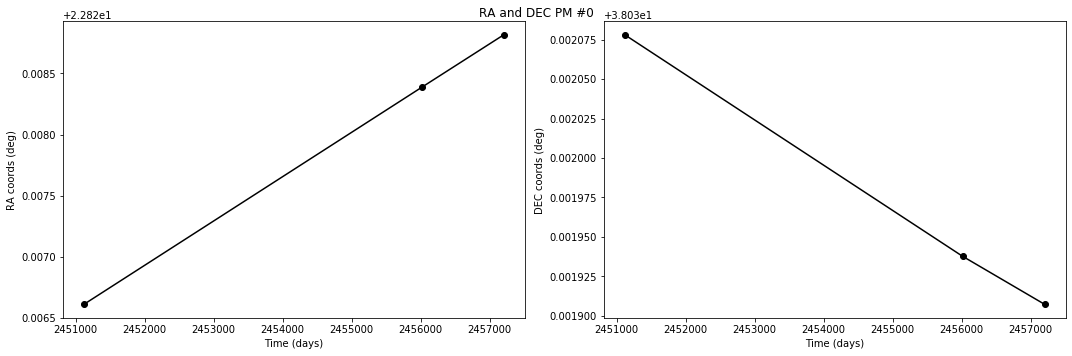

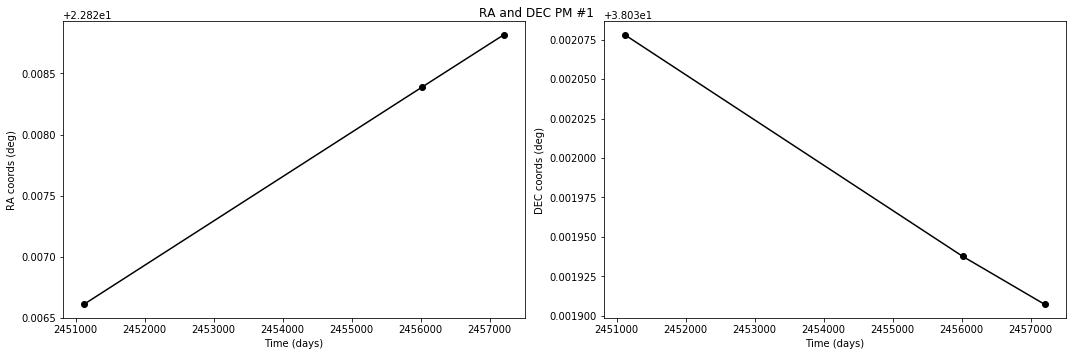

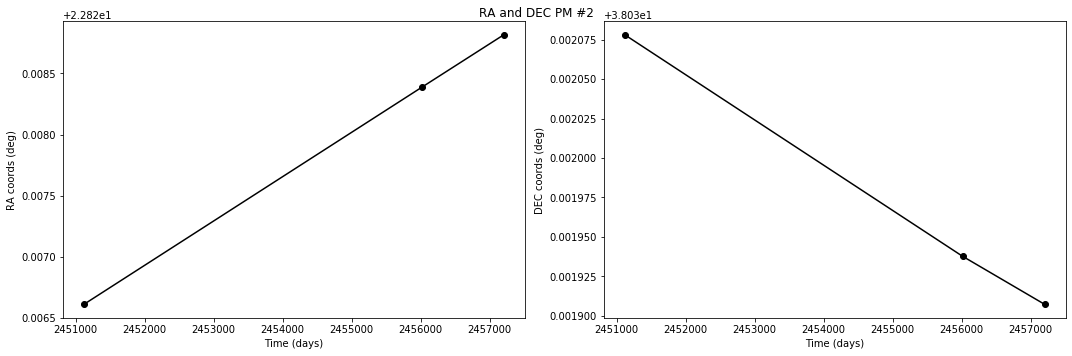

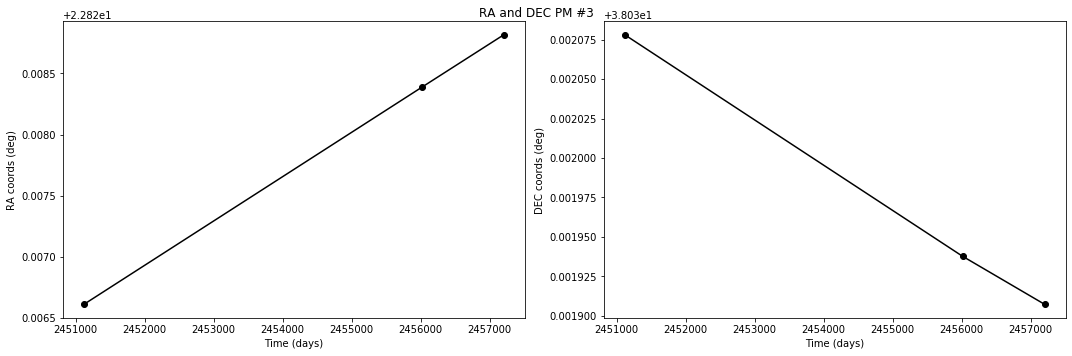

In [137]:
confirm_source(22.826584, 38.032055) 

In [118]:
confirm_source(217.130490, 59.393169)

ConnectionError: HTTPConnectionPool(host='vizier.u-strasbg.fr', port=80): Max retries exceeded with url: /viz-bin/votable (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DEA5031E88>: Failed to establish a new connection: [WinError 10065] A socket operation was attempted to an unreachable host'))

In [65]:
splat.searchLibrary(spt='L4')

,SOURCE_KEY,NAME,DESIGNATION,RA,DEC,DISCOVERY_REFERENCE,OPT_TYPE,OPT_TYPE_REF,NIR_TYPE,NIR_TYPE_REF,LIT_TYPE,LIT_TYPE_REF,OBJECT_TYPE,J_2MASS,J_2MASS_E,H_2MASS,H_2MASS_E,KS_2MASS,KS_2MASS_E,JK_EXCESS,COLOR_EXTREMITY,LUMINOSITY_CLASS,METALLICITY_CLASS,GRAVITY_CLASS_OPTICAL,GRAVITY_CLASS_OPTICAL_REF,GRAVITY_CLASS_NIR,GRAVITY_CLASS_NIR_REF,CLUSTER,CLUSTER_REF,LIBRARY,BINARY,BINARY_REF,SBINARY,SBINARY_REF,COMPANION_NAME,COMPANION_REF,SIMBAD_OTYPE,SIMBAD_NAME,SIMBAD_SPT,SIMBAD_SPT_REF,SIMBAD_SEP,PARALLAX,PARALLAX_E,PARALLEX_REF,DISTANCE_PHOT,DISTANCE_PHOT_E,DISTANCE,DISTANCE_E,MU,MU_E,MU_RA,MU_DEC,MU_REF,VTAN,VTAN_E,RV,RV_E,RV_REF,VSINI,VSINI_E,VSINI_REF,NOTE,SELECT,SPTN,DATA_KEY,DATA_FILE,INSTRUMENT,OBSERVATION_DATE,OBSERVATION_TIME,JULIAN_DATE,PROGRAM_NUMBER,PROGRAM_PI,OBSERVER,RESOLUTION,AIRMASS,REDUCTION_SPEXTOOL_VERSION,REDUCTION_PERSON,REDUCTION_DATE,QUALITY_FLAG,MEDIAN_SNR,SPEX_TYPE,SPEX_GRAVITY_CLASSIFICATION,PUBLISHED,DATA_REFERENCE,NOTE_SP
0,10026,2MASSI J0013578-223520,J00135779-2235200,3.490792,-22.588890,2003A&A...403..929K,L4,2003A&A...403..929K,NaN,NaN,L4,2003A&A...403..929K,VLM,15.775,0.065,14.595,0.062,14.036,0.051,-0.100,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASS J00135779-2235200,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.170000,31.8900,58.00,-61.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11295,11295_10026.fits,SPEX-PRISM,20091104,09 07 30.671410,55139.88000,NaN,NaN,Burgasser,120.0,1.482,v3.4,NaN,NaN,OK,56.000000,L5.0,FLD-G,Y,2014ApJ...794..143B,NaN
1,10062,2MASS J00332386-1521309,J00332386-1521309,8.349417,-15.358583,2003AJ....125.3302G,L4beta,2009AJ....137.3345C,L1,2010ApJ...715..561A,L4beta,2009AJ....137.3345C,VLM,15.286,0.056,14.208,0.051,13.410,0.039,0.290,NaN,NaN,NaN,beta,NaN,INT-G,OTHER,NaN,NaN,young,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASS J00332386-1521309,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.190000,27.2000,330.00,46.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11197,11197_10062.fits,SPEX-PRISM,20081129,05 34 46.271138,54799.73200,NaN,NaN,Allers,120.0,1.249,v3.4,NaN,NaN,OK,79.000000,L2.0,FLD-G,Y,2013ApJ...772...79A,NaN
2,10127,2MASSW J0129122+351758,J01291221+3517580,22.300875,35.299442,1999ApJ...519..802K,L4,1999ApJ...519..802K,NaN,NaN,L4,1999ApJ...519..802K,VLM,16.779,0.159,15.343,0.093,14.696,0.080,0.200,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,Field,2015ApJS..219...33G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MASSW J0129122+351758,L4,2011ApJS..197...19K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,11317,11317_10127.fits,SPEX-PRISM,20091107,10 26 23.630825,55142.93500,NaN,NaN,Burgasser,120.0,1.132,v3.4,NaN,NaN,OK,40.000000,L4.0,FLD-G,Y,2014ApJ...794..143B,NaN
3,10132,2MASS J01311838+3801554,J01311838+3801554,22.826584,38.032055,2007AJ....133..439C,L4:,2007AJ....133..439C,NaN,NaN,L4:,2007AJ....133..439C,VLM,14.679,0.034,13.696,0.034,13.054,0.034,0.280,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brownD*,2MUCD 13061,L4,2009AJ....137....1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.610000,19.8500,394.00,-22.00,2008MNRAS.390.1517C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,10072,10072_10132.fits,SPEX-PRISM,20030903,NaN,52885.50000,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,OK,87.000000,L2.0,FLD-G,Y,2010ApJ...710.1142B,NaN
4,12752,2MASS J01341675-0546530,J01341675-0546530,23.570708,-5.780561,2017arXiv170803688K,NaN,NaN,L4.0,SPL,L4.0,SPL,VLM,16.165,0.073,15.215,0.067,14.521,0.084,0.074,NaN,NaN,NaN,NaN,NaN,FLD-G,SPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.912643,7.257650,41.912643,7.257650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24.0,13022,13022_12752.fits,SPEX-PRISM,20150908,09 39 1.7769010,57273.40210,NaN,Kellogg,Kellogg,120.0,1.662,v4.0,Kellogg,NaN,OK,42.879940,L4.0,FLD-G,Y,2017arXiv170803688K,NaN
5,12757,2MASS J01442482-0430031,J01442482-0430031,26.104292,-4.501961,2017arXiv170803688K,NaN,NaN,L6